# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import os
import time
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from textwrap import wrap
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [2]:
#Import the dataset and read the image into a seperate variable
images='./dataset/Images/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
all_imgs = [path.replace("\\", "/") for path in all_imgs]
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [3]:
all_imgs[0]

'./dataset/Images/1000268201_693b08cb0e.jpg'

In [4]:
## Reading captions
captions_df = pd.read_csv("./dataset/captions.txt")
captions_df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


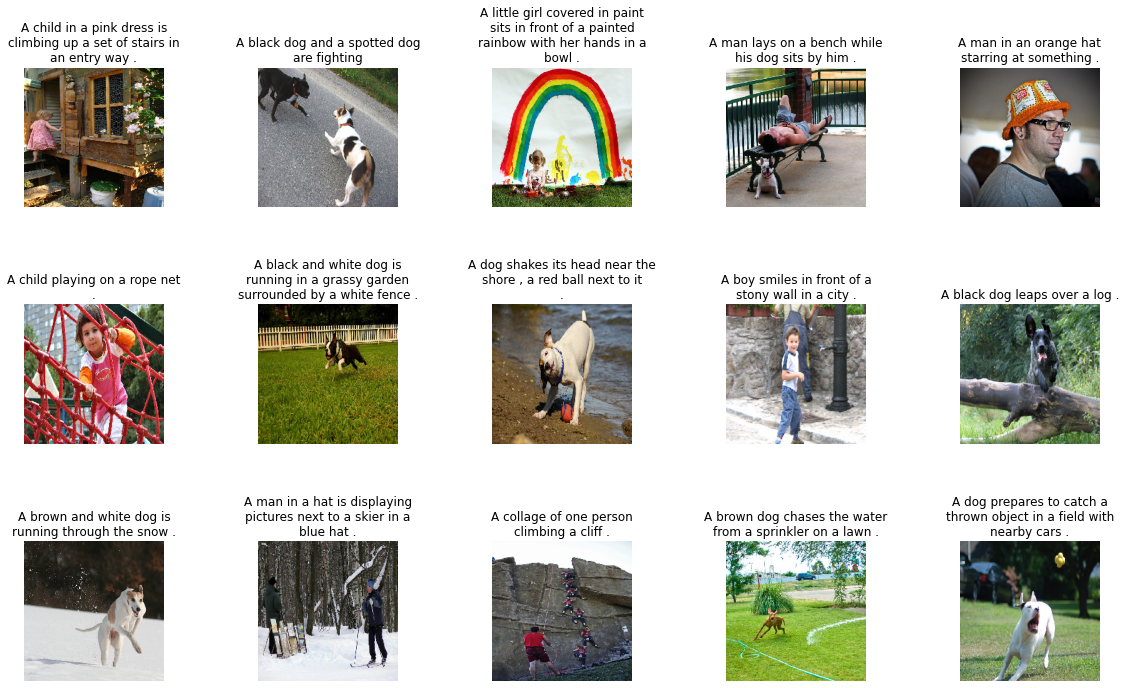

In [5]:
#Visualise both the images & text present in the dataset

def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    image_name = path.split("/")[-1]
    caption = captions_df[captions_df["image"] == image_name].head(1)["caption"].values[0]
    return img, caption

plt.figure(figsize = (20 , 20))
n = 0
for i in range(15):
    n+=1
    index = 4
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
    image, caption = readImage(all_imgs[i])
    plt.imshow(image)
    wrapped_title = "\n".join(wrap(caption, width=30, max_lines=5))
    plt.title(wrapped_title)
    plt.axis("off")

In [6]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    with open(filename, "r") as file:
        text = file.readlines()
    return text

doc = load_doc("./dataset/captions.txt")
print(doc[:300])

['image,caption\n', '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n', '1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n', '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .\n', '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .\n', '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n', '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .\n', '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .\n', '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .\n', '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n', '1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted

In [7]:
print(f"Length of all_img paths: {len(all_imgs)}")
print(f"Captions data frame shape: {captions_df.shape}")

Length of all_img paths: 8091
Captions data frame shape: (40455, 2)


In [8]:
captions_df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


Here for each image 5 captions are provided. Let's create list of image paths to create a dataset.

In [9]:
all_img_paths = [image_path for image_path in all_imgs for _ in range(5)]
print(f"Length of all image path: {len(all_img_paths)}")
print(f"First 10 image_paths: {all_img_paths[:10]}")

Length of all image path: 40455
First 10 image_paths: ['./dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1001773457_577c3a7d70.jpg', './dataset/Images/1001773457_577c3a7d70.jpg', './dataset/Images/1001773457_577c3a7d70.jpg', './dataset/Images/1001773457_577c3a7d70.jpg', './dataset/Images/1001773457_577c3a7d70.jpg']


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [10]:
all_img_id= captions_df["image"].values
all_img_vector= all_img_paths
annotations= captions_df["caption"].values

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df.head(10)

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,./dataset/Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,./dataset/Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,./dataset/Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,./dataset/Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,./dataset/Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,./dataset/Images/1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,./dataset/Images/1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,./dataset/Images/1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,./dataset/Images/1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,./dataset/Images/1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [11]:
import string
#Create a list which contains all the captions
annotations=df["Captions"].tolist()

## cleaning data
remove_punctuation = str.maketrans('', '', string.punctuation)
for i in range(len(annotations)):
    line = annotations[i]
    line = line.split()
    line = [word.lower() for word in line] # convert to lower case
    line = [word.translate(remove_punctuation) for word in line]# remove punctuation from each token
    line = [word for word in line if word.isalpha()]# remove tokens with numbers in them
    annotations[i]=  ' '.join(line)   # store as string

#add the <start> & <end> token to all those captions as well
annotations = ["<start> "+caption+ " <end>" for caption in annotations]

#Create a list which contains all the path to the images
all_img_path=all_img_paths

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [12]:
## print 5 annotations
annotations[:5]

['<start> a child in a pink dress is climbing up a set of stairs in an entry way <end>',
 '<start> a girl going into a wooden building <end>',
 '<start> a little girl climbing into a wooden playhouse <end>',
 '<start> a little girl climbing the stairs to her playhouse <end>',
 '<start> a little girl in a pink dress going into a wooden cabin <end>']

In [13]:
#Create the vocabulary & the counter for the captions
vocabulary = []
vocabulary= [word for annotation in annotations for word in annotation.split(" ") if word not in vocabulary]

val_count=Counter(vocabulary)
val_count

Counter({'<start>': 40455,
         'a': 62986,
         'child': 1545,
         'in': 18974,
         'pink': 735,
         'dress': 348,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6713,
         'stairs': 109,
         'an': 2432,
         'entry': 1,
         'way': 50,
         '<end>': 40455,
         'girl': 3328,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'the': 18418,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3832,
         'dog': 8136,
         'and': 8851,
         'spotted': 37,
         'are': 3504,
         'fighting': 132,
         'tricolored': 14,
         'playing': 2008,
         'with': 7765,
         'each': 430,
         'other': 773,
         'on': 10743,
         'road': 388,
         'white': 3940,
         'brown': 2563,
         'spots': 29,
         

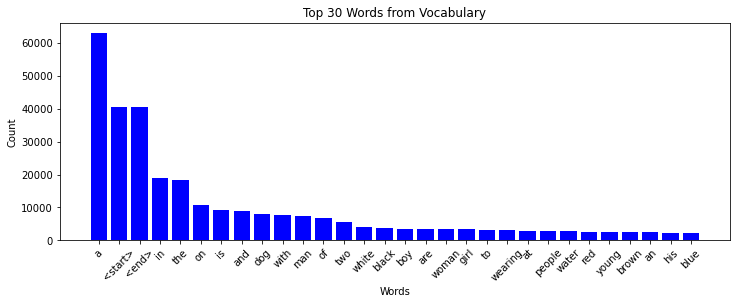

In [14]:
#Visualise the top 30 occuring words in the captions
top30_elements = dict(val_count.most_common(30))

# Extract keys and values for plotting
words = list(top30_elements.keys())
counts = list(top30_elements.values())

# Create a bar chart
plt.figure(figsize=(12, 4))
plt.bar(words, counts, color='blue')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Top 30 Words from Vocabulary')
plt.show()

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [15]:
# create the tokenizer
# tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=5000, filters=" ", oov_token="<unk>", )
tokenizer.fit_on_texts(annotations)

In [16]:
# Create word-to-index and index-to-word mappings.
# Convert words to indices
sequences = tokenizer.texts_to_sequences(annotations)

print("\nIndex to Words")
for index in sequences[0]:
    print(f"{index} ----> {tokenizer.index_word[index]}")
    
# Convert indices back to words
print("\nWords to Index")
for word in annotations[0].split(" "):
    print(f"{word} ----> {tokenizer.word_index.get(word)}")


Index to Words
3 ----> <start>
2 ----> a
43 ----> child
5 ----> in
2 ----> a
91 ----> pink
171 ----> dress
8 ----> is
120 ----> climbing
54 ----> up
2 ----> a
396 ----> set
13 ----> of
393 ----> stairs
5 ----> in
29 ----> an
1 ----> <unk>
694 ----> way
4 ----> <end>

Words to Index
<start> ----> 3
a ----> 2
child ----> 43
in ----> 5
a ----> 2
pink ----> 91
dress ----> 171
is ----> 8
climbing ----> 120
up ----> 54
a ----> 2
set ----> 396
of ----> 13
stairs ----> 393
in ----> 5
an ----> 29
entry ----> 5200
way ----> 694
<end> ----> 4


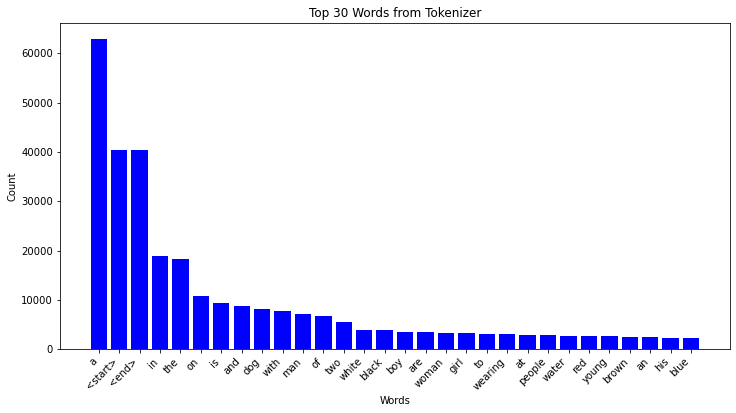

In [17]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
# Get word counts and sort them by frequency
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 30 words and their counts
top30_words = [word[0] for word in sorted_word_counts[:30]]
top30_counts = [word[1] for word in sorted_word_counts[:30]]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top30_words, top30_counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 30 Words from Tokenizer')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector= pad_sequences(sequences, padding="post")

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 37)


In [19]:
cap_vector[:3]

array([[   3,    2,   43,    5,    2,   91,  171,    8,  120,   54,    2,
         396,   13,  393,    5,   29,    1,  694,    4,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   3,    2,   20,  315,   65,    2,  195,  118,    4,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   3,    2,   41,   20,  120,   65,    2,  195, 2426,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [20]:
#write your code here to create the dataset consisting of image paths
image_paths = df["Path"].tolist()
print(f"sample path: {image_paths[:5]}")

sample path: ['./dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg', './dataset/Images/1000268201_693b08cb0e.jpg']


In [21]:
#write your code here for creating the function. This function should return images & their path
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    # Convert the pixel values to a floating-point tensor
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [22]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path
unique_img_vector = sorted (set(all_img_vector))
img_dataset = tf.data.Dataset.from_tensor_slices(unique_img_vector)

In [23]:
img_dataset = img_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(64)
img_dataset 

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [24]:
# Check the size (number of elements) of the dataset
img_dataset_size = tf.data.experimental.cardinality(img_dataset).numpy()
print("Image Dataset size:", img_dataset_size)

Image Dataset size: 127


In [25]:
for image, path in img_dataset.take(1):
    print("Image shape:", image.numpy()[0])
    print("Image path:", tf.strings.as_string(path)[0])

Image shape: [[[-5.4579198e-01 -5.1085913e-01 -3.7435186e-01]
  [-1.4921635e-01 -1.9675493e-04 -3.1106710e-02]
  [-9.7177267e-02  4.6858430e-02  4.3021560e-02]
  ...
  [-9.7224247e-01 -9.6819955e-01 -9.8191810e-01]
  [-9.6078575e-01 -9.4020623e-01 -9.7377020e-01]
  [-9.6212077e-01 -9.3846858e-01 -9.8195148e-01]]

 [[-5.7653260e-01 -5.3617233e-01 -4.2858374e-01]
  [-1.4806336e-01  5.8089495e-03 -5.5708170e-02]
  [-7.8158259e-02  6.0893416e-02  7.8846335e-02]
  ...
  [-9.6420521e-01 -9.5636207e-01 -9.8523390e-01]
  [-9.3927324e-01 -9.2645574e-01 -9.5595336e-01]
  [-9.9189347e-01 -9.6899247e-01 -9.7989315e-01]]

 [[-5.9273523e-01 -5.6866682e-01 -4.3528360e-01]
  [-1.3315433e-01  5.4714680e-03 -1.3691187e-02]
  [-8.0161095e-02  5.6944609e-02  1.0495746e-01]
  ...
  [-9.5249414e-01 -9.2763758e-01 -9.5031697e-01]
  [-9.3824595e-01 -8.6041492e-01 -9.8345113e-01]
  [-8.2868659e-01 -6.7541003e-01 -9.5786130e-01]]

 ...

 [[ 3.0902338e-01 -4.4748360e-01 -9.2698383e-01]
  [-2.7214885e-03 -4.95880

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [26]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output      #write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)#build the final model using both input & output layer

In [27]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
from tqdm import tqdm
for img, path in tqdm(img_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                                  (batch_features.shape[0], -1, batch_features.shape[3]))

    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())


100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [13:54<00:00,  6.57s/it]


### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [28]:
print(len(all_img_paths))
print(len(cap_vector))

40455
40455


In [29]:
#write your code here
from sklearn.model_selection import train_test_split
path_train, path_test, cap_train, cap_test = train_test_split( all_img_paths, cap_vector, test_size=0.2, random_state=42)

In [30]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [31]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image_path, caption):
    path = image_path.numpy().decode('utf-8')
    img_tensor = np.load(path+".npy")# write your code here to extract the features from the dictionary stored earlier
    return img_tensor, caption

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [32]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

def gen_dataset(image_path, caption, batch_size=32, buffer_size=1000):
    
    dataset = tf.data.Dataset.from_tensor_slices((image_path, caption))
    dataset = dataset.map(lambda item1, item2: tf.py_function(
            map_func, [item1, item2], [tf.float32, tf.int32]),
            num_parallel_calls=tf.data.AUTOTUNE)
    
    dataset = dataset.shuffle(buffer_size).batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    
    return dataset



In [33]:
train_dataset=gen_dataset(path_train,cap_train, 64)
test_dataset=gen_dataset(path_test,cap_test, 64)

In [34]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 37)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [35]:
BATCH_SIZE = 64

In [36]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test)// BATCH_SIZE #len(total test images) // BATCH_SIZE
print(f"Number of train_steps: {train_num_steps}")
print(f"Number of test_steps: {test_num_steps}")

Number of train_steps: 505
Number of test_steps: 126


### Encoder

In [37]:
from tensorflow.keras import Model

In [38]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features = self.dense(features)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)  # extract the features from the image shape: (batch, 8*8, embed_dim)
        return features

In [39]:
encoder=Encoder(embedding_dim)

### Attention model

In [40]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden,1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                            self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights = tf.nn.softmax(score,axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1) # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [41]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)#build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed =  self.embed(x)  # embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [42]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [43]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [44]:
optimizer = tf.keras.optimizers.Adam() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')#define your loss object

In [45]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [46]:
checkpoint_path = "./checkpoint/"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [47]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [48]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss += loss_function(target[:,i], predictions)
            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

        avg_loss = (loss / int(target.shape[1]))
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [49]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
    #write your code here to do the training steps
        features = encoder(img_tensor)
        for i in range(1,target.shape[1]):
            predictions,hidden,_ = decoder(dec_input,features,hidden)
            loss += loss_function(target[:,i], predictions)
            predicted_id = tf.argmax(predictions,1)
            dec_input = tf.expand_dims(predicted_id, 1)

    avg_loss = (loss / int(target.shape[1]))
        
    return loss, avg_loss

In [50]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch,(img_tensor,target)) in enumerate(test_dataset):
        batch_loss,t_loss = test_step(img_tensor,target)
        total_loss += t_loss
    return total_loss/test_num_steps

In [51]:
import time
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.354, & test loss is 1.993
Time taken for 1 epoch 1336.2354204654694 sec

Test loss has been reduced from 100.000 to 1.993


  7%|█████▎                                                                         | 1/15 [22:17<5:12:07, 1337.70s/it]

For epoch: 2, the train loss is 1.047, & test loss is 1.972
Time taken for 1 epoch 1150.4663734436035 sec

Test loss has been reduced from 1.993 to 1.972


 13%|██████████▌                                                                    | 2/15 [41:29<4:26:11, 1228.61s/it]

For epoch: 3, the train loss is 0.948, & test loss is 1.944
Time taken for 1 epoch 1109.8801600933075 sec

Test loss has been reduced from 1.972 to 1.944


 27%|████████████████████▌                                                        | 4/15 [1:18:28<3:30:31, 1148.33s/it]

For epoch: 4, the train loss is 0.879, & test loss is 1.985
Time taken for 1 epoch 1107.773564338684 sec



 33%|█████████████████████████▋                                                   | 5/15 [1:36:55<3:08:54, 1133.44s/it]

For epoch: 5, the train loss is 0.822, & test loss is 1.973
Time taken for 1 epoch 1107.0209555625916 sec



 40%|██████████████████████████████▊                                              | 6/15 [1:55:22<2:48:39, 1124.42s/it]

For epoch: 6, the train loss is 0.772, & test loss is 1.986
Time taken for 1 epoch 1106.9175219535828 sec



 47%|███████████████████████████████████▉                                         | 7/15 [2:13:50<2:29:13, 1119.13s/it]

For epoch: 7, the train loss is 0.727, & test loss is 2.034
Time taken for 1 epoch 1108.2353053092957 sec



 53%|█████████████████████████████████████████                                    | 8/15 [2:32:17<2:10:07, 1115.36s/it]

For epoch: 8, the train loss is 0.685, & test loss is 2.075
Time taken for 1 epoch 1107.2790582180023 sec



 60%|██████████████████████████████████████████████▏                              | 9/15 [2:50:43<1:51:13, 1112.32s/it]

For epoch: 9, the train loss is 0.647, & test loss is 2.134
Time taken for 1 epoch 1105.6295654773712 sec



 67%|██████████████████████████████████████████████████▋                         | 10/15 [3:09:04<1:32:23, 1108.78s/it]

For epoch: 10, the train loss is 0.610, & test loss is 2.199
Time taken for 1 epoch 1100.8658418655396 sec



 73%|███████████████████████████████████████████████████████▋                    | 11/15 [3:27:25<1:13:45, 1106.44s/it]

For epoch: 11, the train loss is 0.577, & test loss is 2.241
Time taken for 1 epoch 1101.126350402832 sec



 80%|██████████████████████████████████████████████████████████████▍               | 12/15 [3:46:01<55:27, 1109.26s/it]

For epoch: 12, the train loss is 0.545, & test loss is 2.333
Time taken for 1 epoch 1115.6941390037537 sec



 87%|███████████████████████████████████████████████████████████████████▌          | 13/15 [4:04:24<36:54, 1107.39s/it]

For epoch: 13, the train loss is 0.518, & test loss is 2.421
Time taken for 1 epoch 1103.0851519107819 sec



 93%|████████████████████████████████████████████████████████████████████████▊     | 14/15 [4:22:56<18:28, 1108.86s/it]

For epoch: 14, the train loss is 0.490, & test loss is 2.503
Time taken for 1 epoch 1112.2541146278381 sec



100%|██████████████████████████████████████████████████████████████████████████████| 15/15 [4:41:19<00:00, 1125.29s/it]

For epoch: 15, the train loss is 0.465, & test loss is 2.561
Time taken for 1 epoch 1102.7710828781128 sec



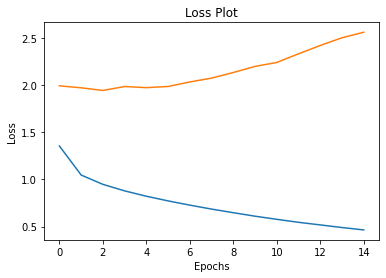

In [52]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [53]:
attention_features_shape = 64
max_length = cap_vector.shape[1]
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()#extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [63]:
def beam_evaluate(image, beam_index = 5):

    #write your code to evaluate the result using beam search
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        temp = []
        for i, s in enumerate(result):
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            word_preds = np.argsort(predictions[0])[-beam_index:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)

                prob += np.log(predictions[0][w])

                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]


        predicted_id = result[-1]
        pred_list = predicted_id[0]

        prd_id = pred_list[-1]
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break


    result2 = result[-1][0]

    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)

        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
                  
    return final_caption



In [55]:
from PIL import Image
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [56]:
from nltk.translate.bleu_score import sentence_bleu

In [57]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [58]:
def test_caption_generation(img_test):


    rid = np.random.randint(0, len(img_test))
    test_image = img_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join(
        tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]
    )

    result, attention_plot,pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)      


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = [real_caption.split()]
    reference = real_appn
    candidate = pred_caption.split()

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)

    score1 = sentence_bleu(reference, candidate, weights=(1,0,0,0))
    score2 = sentence_bleu(reference, candidate, weights=(0,1,0,0))
    score3 = sentence_bleu(reference, candidate, weights=(0,0,1,0))
    score4 = sentence_bleu(reference, candidate, weights=(0,0,0,1))
    print("\nBELU score: ")
    print(f"Individual 1-gram: {score1*100}")
    print(f"Individual 2-gram: {score2*100}")
    print(f"Individual 3-gram: {score3*100}")
    print(f"Individual 4-gram: {score4*100}")

    plot_attmap(result, attention_plot, test_image)


    Image.open(test_image)

Real Caption: three boys leaping into a swimming pool
Prediction Caption: three little boys swimming trunks hold hands for a pool

BELU score: 
Individual 1-gram: 50.0
Individual 2-gram: 2.2250738585072627e-306
Individual 3-gram: 2.2250738585072627e-306
Individual 4-gram: 2.2250738585072627e-306


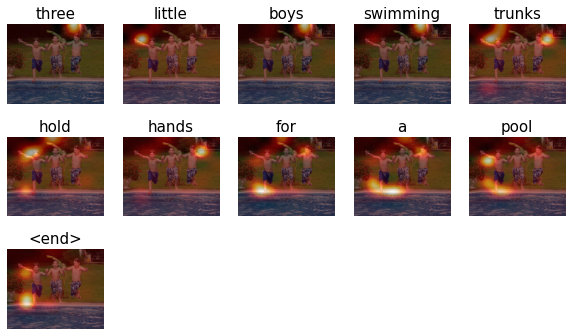

In [70]:
test_caption_generation(path_test)

the little girl a young girl in a sprinkler


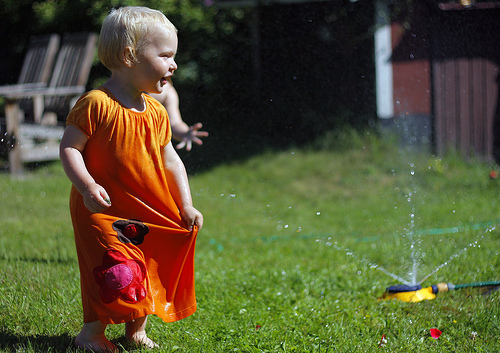

In [71]:
test_image = "./dataset/Images/3767841911_6678052eb6.jpg"
captions=beam_evaluate(test_image)
print(captions)
Image.open(test_image)


## Evaluation with Unseen Data

In [72]:
def Prediction_Unknown_data(test_image):
    #Testing on test image
    openImg = test_image
    result, attention_plot,pred_test = evaluate(test_image)
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    candidate = pred_caption.split()

    print ('Prediction Caption:', pred_caption)
    print ('')
    newsize = (800, 800)
    im = Image.open(openImg).resize(newsize)
    width, height = im.size
    print(width,height)
    div=3
    if width > 3000:
        div=10
    im = im.resize((width//div, height//div))
    
    return im


Prediction Caption: a black dog is standing in the sand one carrying a ball in its mouth

800 800


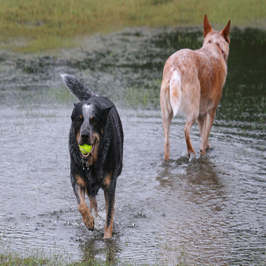

In [74]:
Prediction_Unknown_data(path_test[59])

In [124]:
def test_unseen_data(img_test, caption, weights=(0.5, 0.5, 0, 0)):
    
    real_caption = ' '.join(
        tokenizer.index_word[i] for i in caption if i not in [0]
    )
    result, attention_plot,pred_test = evaluate(img_test)

    real_caption=filt_text(real_caption)      


    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = [real_caption.split()]
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)
    return score
    

In [125]:
scores = []
for i in range(len(path_test)):
    score = test_unseen_data(path_test[i], cap_test[i], weights=(0.5, 0.0, 0.5, 0))
    scores.append(score)
    


In [129]:
##Overall bleu score of the model

sum(scores)/ len(scores) * 100

3.176077138566291

## Convert Captions to Audio

In [75]:
# Libraries to convert text into audio
from gtts import gTTS
from IPython import display

In [79]:
#Caption to audio conversion
soundFile = 'pred_caption.mp3'
pred_caption = beam_evaluate(path_test[50])
tts = gTTS(pred_caption, slow = False)
tts.save(soundFile)

display.display(display.Audio(soundFile))



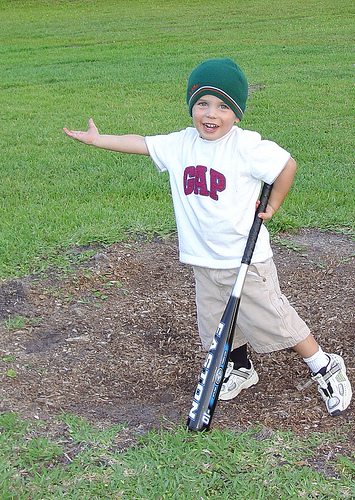

In [80]:
Image.open(path_test[50])